Commençons par importer les bibliothèques nécessaires et charger les données dans notre environnement Python.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Chargement des données et bibliothèques

In [9]:
df = pd.read_csv('daataa.csv',sep=";")

In [10]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Nous pouvons utiliser des graphiques pour visualiser les caractéristiques de notre jeu de données. Commençons par visualiser la distribution des valeurs dans chaque colonne pour les tumeurs malignes (M) et bénignes (B) séparément.

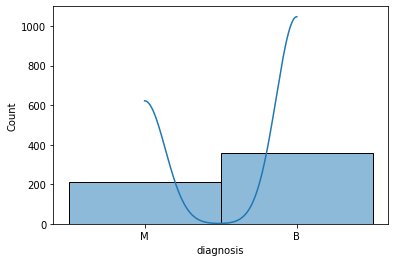

In [11]:
sns.histplot(df['diagnosis'], kde=True)
plt.show()


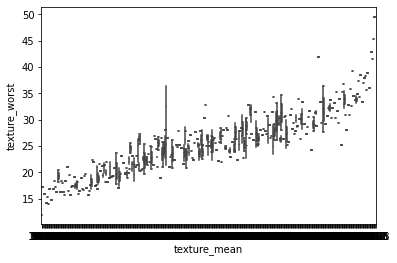

In [12]:
sns.boxplot(x='texture_mean', y='texture_worst', data=df)
plt.show()


In [20]:
print("Nombre de lignes : ", df.shape[0])
print("Nombre de colonnes : ", df.shape[1])

Nombre de lignes :  569
Nombre de colonnes :  32


In [13]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

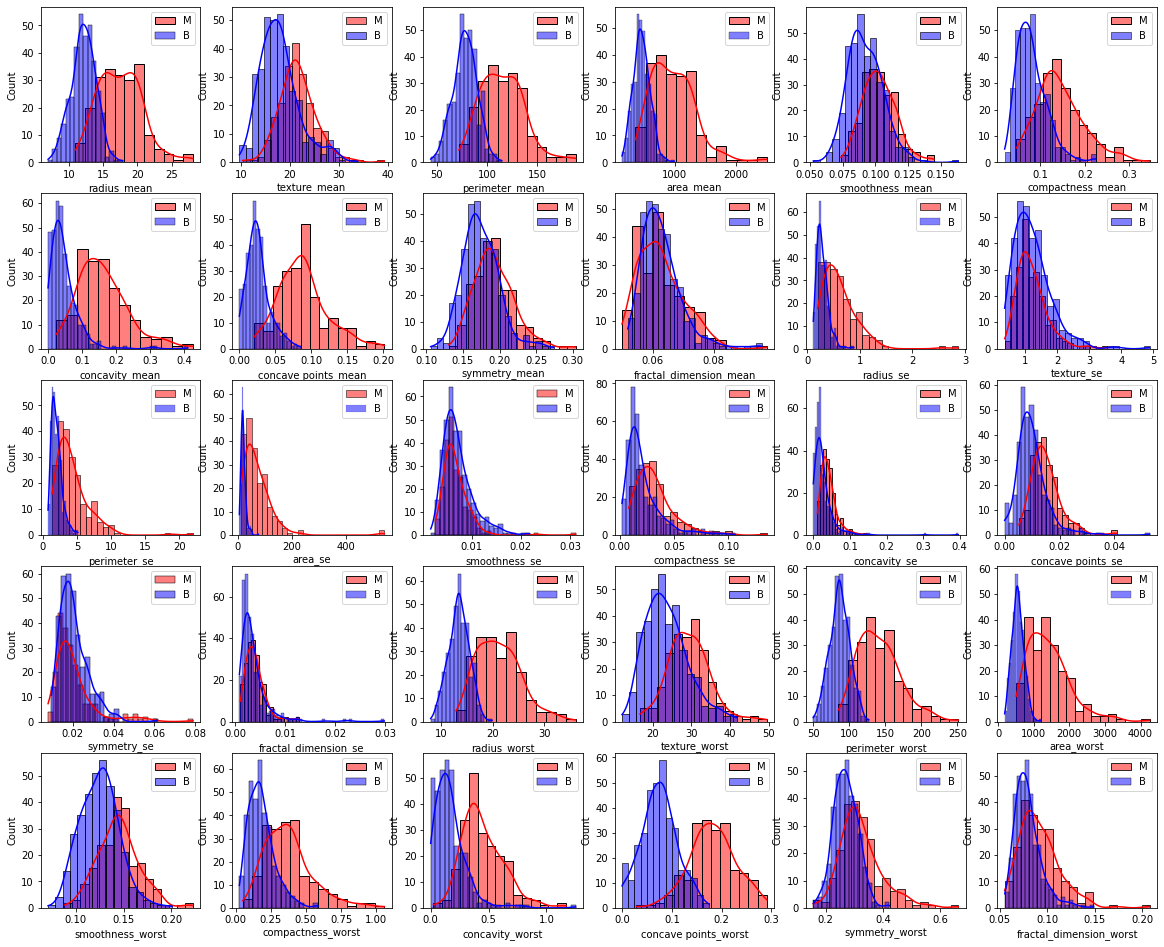

In [17]:
plt.figure(figsize=(20,20))
for i, col in enumerate(df.columns[2:], 1):
    plt.subplot(6, 6, i)
    sns.histplot(df.loc[df.diagnosis=="M", col], color="red", label="M", kde=True)
    sns.histplot(df.loc[df.diagnosis=="B", col], color="blue", label="B", kde=True)
    plt.legend()
plt.show()

Nous pouvons voir que certaines caractéristiques, comme texture_mean et area_worst, ont des distributions très différentes pour les tumeurs malignes et bénignes. D'autres caractéristiques, comme fractal_dimension_mean, ont des distributions similaires pour les deux types de tumeurs.

## **Corrélation entre les caractéristiques**
Nous pouvons également examiner la corrélation entre les caractéristiques pour voir s'il y a des relations importantes à noter.

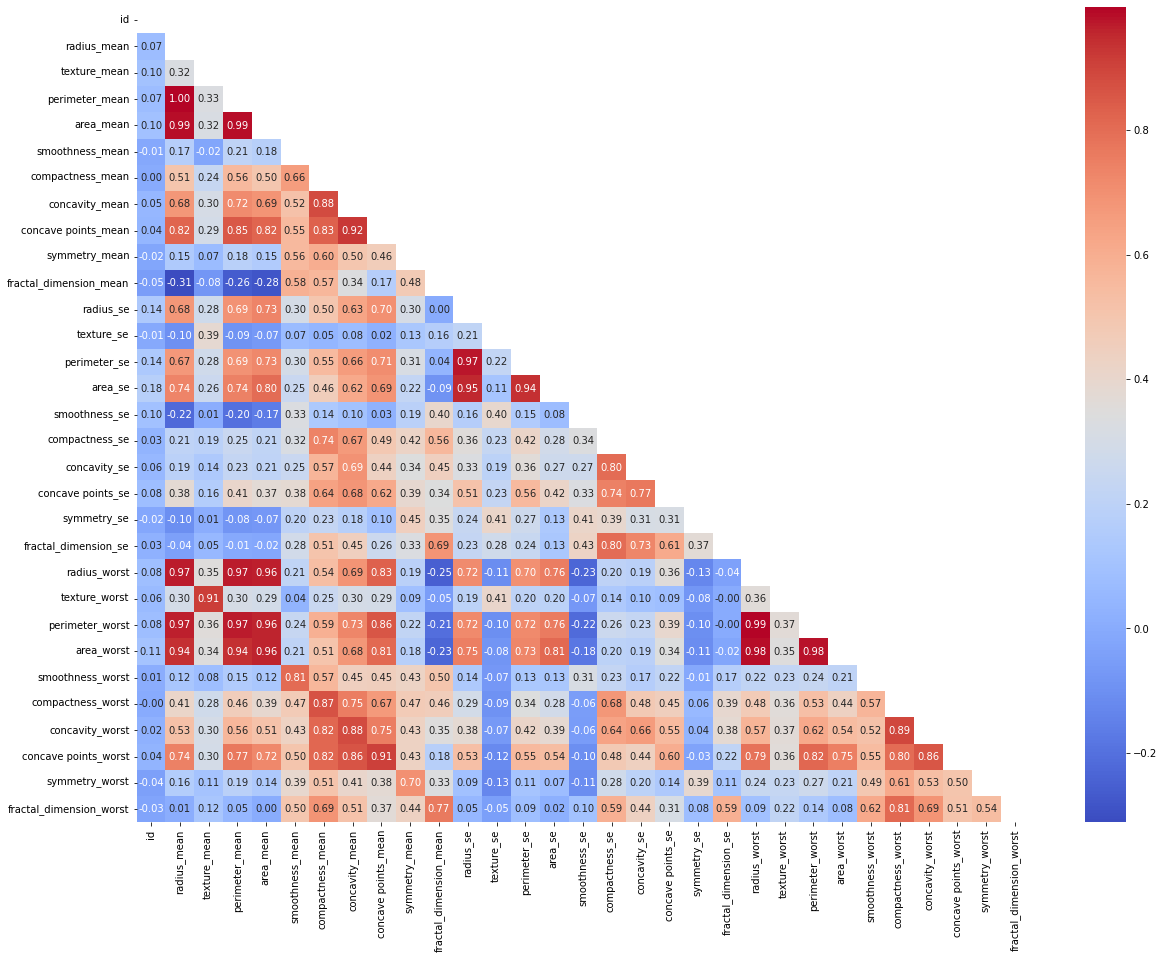

In [18]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, fmt=".2f", mask=mask, cmap="coolwarm")
plt.show()

Nous pouvons voir que certaines caractéristiques sont fortement corrélées entre elles, comme radius_mean, perimeter_mean et area_mean. Nous pouvons également voir que certaines caractéristiques sont fortement corrélées avec la variable cible, comme concavity_mean, concave points_mean et perimeter_worst.

Relation entre les caractéristiques et la variable cible
Enfin, nous pouvons examiner la relation entre chaque caractéristique et la variable cible (diagnosis).

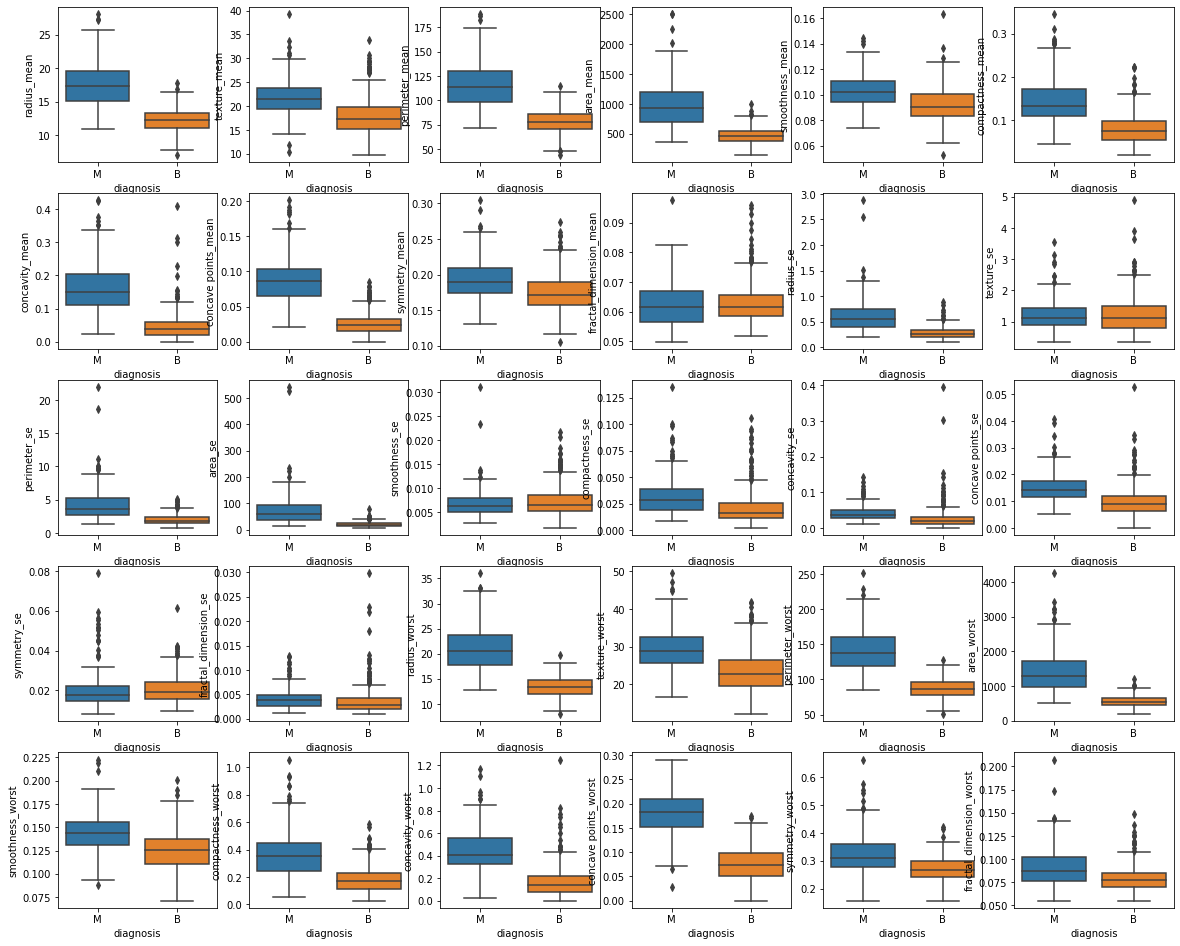

In [19]:
plt.figure(figsize=(20,20))
for i, col in enumerate(df.columns[2:], 1):
    plt.subplot(6, 6, i)
    sns.boxplot(x="diagnosis", y=col, data=df)
plt.show()

Nous pouvons voir que certaines caractéristiques, comme texture_mean et concavity_mean, ont des distributions très différentes pour les tumeurs malignes et bénignes. D'autres caractéristiques, comme fractal_dimension_mean, ont des distributions similaires pour les deux types de tumeurs.

## **CLASSIFICATION**
Prétraitement des données
Nous allons d'abord séparer les données en deux ensembles : un ensemble d'entraînement et un ensemble de test. L'ensemble d'entraînement sera utilisé pour entraîner notre modèle, tandis que l'ensemble de test sera utilisé pour évaluer les performances de notre modèle.

Nous allons également supprimer la colonne "id" qui n'est pas pertinente pour la classification, ainsi que convertir la variable cible "diagnosis" en une variable numérique.

In [29]:
# Séparation des données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

X = df.drop(["id", "diagnosis"], axis=1)
y = df["diagnosis"].map({"M": 1, "B": 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérification des dimensions des ensembles d'entraînement et de test
print("Dimensions de l'ensemble d'entraînement :", X_train.shape)
print("Dimensions de l'ensemble de test :", X_test.shape)

# Conversion de la variable cible en une variable numérique
y_train = np.array(y_train)
y_test = np.array(y_test)

Dimensions de l'ensemble d'entraînement : (455, 30)
Dimensions de l'ensemble de test : (114, 30)


Analyse exploratoire des données
Nous allons maintenant procéder à une analyse exploratoire des données pour comprendre les relations entre les différentes caractéristiques et la variable cible.


Modélisation
Nous allons maintenant entraîner notre modèle de classification. Nous allons utiliser le modèle de classification par forêts aléatoires (Random Forest Classifier) qui est une méthode de classification ensembliste basée sur la création d'un grand nombre d'arbres de décision aléatoires et l'agrégation de leurs prédictions.

In [33]:
# Entraînement du modèle de classification par forêts aléatoires
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = clf.predict(X_test)

Évaluation du modèle
Nous allons maintenant évaluer les performances de notre modèle en calculant plusieurs métriques de classification telles que la précision, le rappel et le score F1.

In [34]:
# Calcul de la précision, du rappel et du score F1
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Précision :", precision)
print("Rappel :", recall)

Précision : 0.975609756097561
Rappel : 0.9302325581395349


Modèle de régression logistique

In [35]:
# Entraînement du modèle de régression logistique
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_lr = lr.predict(X_test)

# Calcul de la précision, du rappel et du score F1
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Précision (Logistic Regression) :", precision_lr)
print("Rappel (Logistic Regression) :", recall_lr)
print("Score F1 (Logistic Regression) :", f1_lr)

Précision (Logistic Regression) : 0.975609756097561
Rappel (Logistic Regression) : 0.9302325581395349
Score F1 (Logistic Regression) : 0.9523809523809524


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Modèle d'arbre de décision

In [36]:
# Entraînement du modèle d'arbre de décision
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_dt = dt.predict(X_test)

# Calcul de la précision, du rappel et du score F1
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Précision (Decision Tree) :", precision_dt)
print("Rappel (Decision Tree) :", recall_dt)
print("Score F1 (Decision Tree) :", f1_dt)

Précision (Decision Tree) : 0.9302325581395349
Rappel (Decision Tree) : 0.9302325581395349
Score F1 (Decision Tree) : 0.9302325581395349


Comparaison des modèles
Nous pouvons maintenant comparer les performances des trois modèles en affichant les métriques de classification :

In [37]:
# Affichage des métriques de classification
print("\nMétriques de classification :\n")
print("Précision (Random Forest) :", precision)
print("Rappel (Random Forest) :", recall)
print("Score F1 (Random Forest) :", f1)

print("\nPrécision (Logistic Regression) :", precision_lr)
print("Rappel (Logistic Regression) :", recall_lr)
print("Score F1 (Logistic Regression) :", f1_lr)

print("\nPrécision (Decision Tree) :", precision_dt)
print("Rappel (Decision Tree) :", recall_dt)
print("Score F1 (Decision Tree) :", f1_dt)


Métriques de classification :

Précision (Random Forest) : 0.975609756097561
Rappel (Random Forest) : 0.9302325581395349
Score F1 (Random Forest) : 0.9523809523809524

Précision (Logistic Regression) : 0.975609756097561
Rappel (Logistic Regression) : 0.9302325581395349
Score F1 (Logistic Regression) : 0.9523809523809524

Précision (Decision Tree) : 0.9302325581395349
Rappel (Decision Tree) : 0.9302325581395349
Score F1 (Decision Tree) : 0.9302325581395349


Nous pouvons également afficher les matrices de confusion pour chaque modèle :

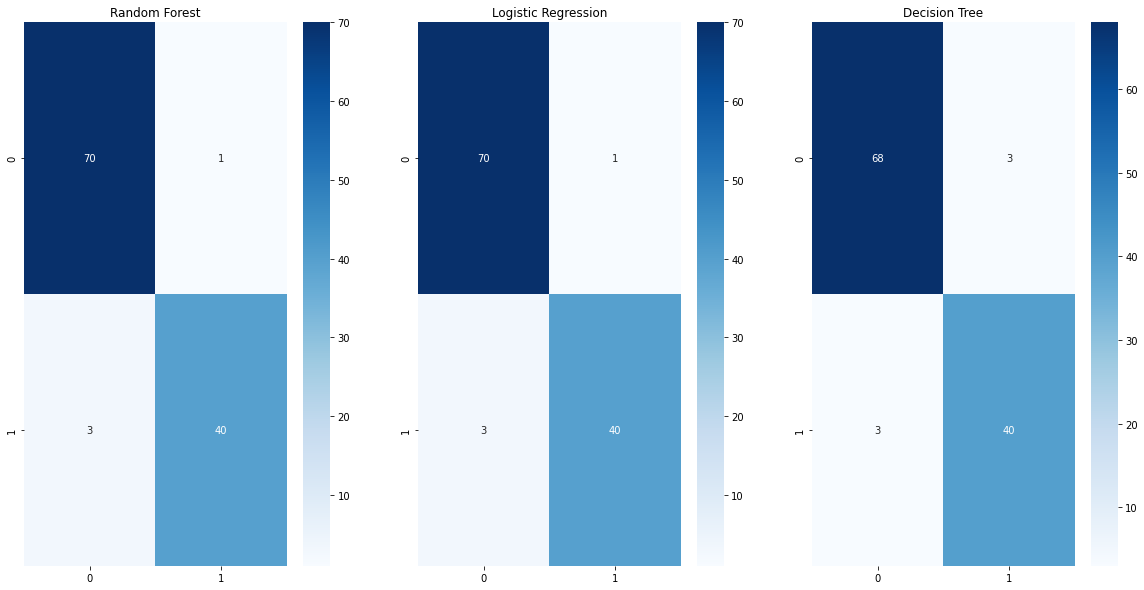

In [38]:
# Affichage des matrices de confusion
from sklearn.metrics import confusion_matrix

confusion_matrix_rf = confusion_matrix(y_test, y_pred)
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
sns.heatmap(confusion_matrix_rf, annot=True, cmap="Blues")
plt.title("Random Forest")

plt.subplot(1,3,2)
sns.heatmap(confusion_matrix_lr, annot=True, cmap="Blues")
plt.title("Logistic Regression")

plt.subplot(1,3,3)
sns.heatmap(confusion_matrix_dt, annot=True, cmap="Blues")
plt.title("Decision Tree")

plt.show()

Cela nous donnera une idée de la capacité de chaque modèle à prédire les classes positives et négatives.
nous pouvons maintenant utiliser la validation croisée K-fold pour évaluer la performance de nos modèles sur différentes partitions de données. Nous allons utiliser la validation croisée K-fold avec K=5 pour cette tâche.


In [51]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Separate features and target variable
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

# Create a KFold object with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize list to store accuracy scores
scores = []

# Loop over each fold
for train_index, test_index in kf.split(X):
    # Separate the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and fit decision tree classifier on training data
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    # Predict the target variable on test data
    y_pred = clf.predict(X_test)
    
    # Calculate and store the accuracy score for this fold
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    
# Calculate and print the mean accuracy score over all folds
print('Mean accuracy score:', sum(scores)/len(scores))

Mean accuracy score: 0.9332246545567457
